# **Principal Component Analysis (PCA)**

**Import Libray**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

**Data Set**

In [2]:
data = np.array([[40,20],
                [55, 30],
                [70, 60],
                [50, 35],
                [45, 40],
                [62, 75],
                [45, 30],
                [68, 80],
                [80, 70],
                [75, 90]])  # Fist Coulmn marks of maths and second column is marks of science

**Use Scatter Plot**

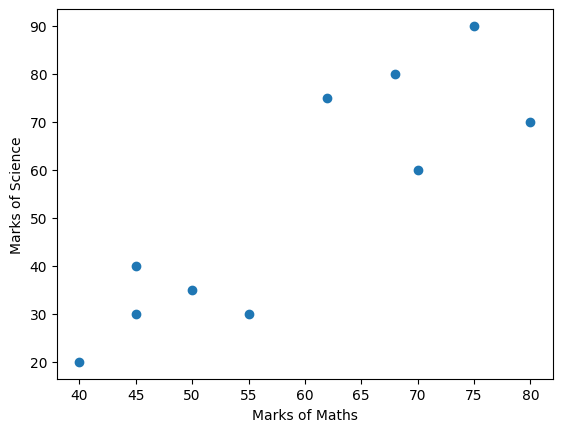

In [3]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Marks of Maths')
plt.ylabel('Marks of Science')
plt.show()

### Feacture Scaling

* Because the x and Y ranges are different

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.43299332, -1.39951173],
       [-0.3016828 , -0.97541727],
       [ 0.82962771,  0.29686613],
       [-0.67878631, -0.76337004],
       [-1.05588981, -0.5513228 ],
       [ 0.2262621 ,  0.93300782],
       [-1.05588981, -0.97541727],
       [ 0.67878631,  1.14505506],
       [ 1.58383472,  0.72096059],
       [ 1.20673122,  1.56914952]])

### Use Principal Component Analysis

In [13]:
from sklearn.decomposition import PCA
# Create Object
pca = PCA(n_components=1) # Number of comporents
# Train scaled data
pca.fit(scaled_data)

PCA(n_components=1)

**Variance**

In [14]:
pca.explained_variance_ratio_

array([0.93500282])

**Reducing the number of demantion**

In [15]:
pca_scaled_data = pca.transform(scaled_data)

In [16]:
scaled_data.shape # Before use PCA Data Sets

(10, 2)

In [17]:
pca_scaled_data.shape # After use PCA Data Sets

(10, 1)

In [18]:
# Use Scatter plot
pca_scaled_data = pca.inverse_transform(pca_scaled_data)

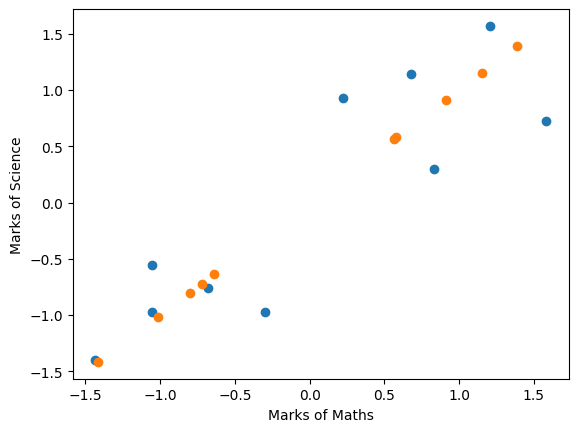

In [19]:
plt.scatter(scaled_data[:,0],scaled_data[:,1]) # Before Scatter Plot
plt.scatter(pca_scaled_data[:,0],pca_scaled_data[:,1]) # After Scatter Ploat
plt.xlabel('Marks of Maths')
plt.ylabel('Marks of Science')
plt.show()


*   Blue point ---> Before Data set(2D)
*   Orange point ---> After Data set(1D)



## **Visualisation a multi-dimensional data set in a graph**

### **PCA for Visualization**

In [20]:
# Use Hand Load Digits Data sets(Inbulid in sklearn)
from sklearn.datasets import load_digits
# Create Object
digits = load_digits()

In [21]:
# Shape Data set
digits.data.shape

(1797, 64)

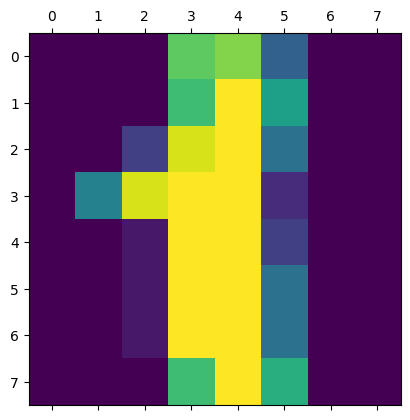

In [22]:
# One data set in Plot
import matplotlib.pyplot as plt
plt.matshow(digits.images[1])
plt.show()

In [23]:
# Look at Value
digits.target[1]

1

In [24]:
# Index 33 value
digits.target[33]

5

**Use PCA reducing the number of demantion**

In [27]:
from sklearn.decomposition import PCA
# Create Object
pca = PCA(n_components=10) # Number of comporents
# Train scaled data
new_digits = pca.fit_transform(digits.data)

In [28]:
new_digits.shape  # After use PCA Data Sets (10D)

(1797, 10)

In [31]:
digits.data.shape # Before use PCA Data Sets (64D)

(1797, 64)

**Convert 2D**

In [32]:
from sklearn.decomposition import PCA
# Create Object
pca = PCA(n_components=2) # Number of comporents
# Train scaled data
new_digits = pca.fit_transform(digits.data)

In [33]:
new_digits.shape  # After use PCA Data Sets (2D)

(1797, 2)

**Now use can Draw Ploat(Becouse 2D)**

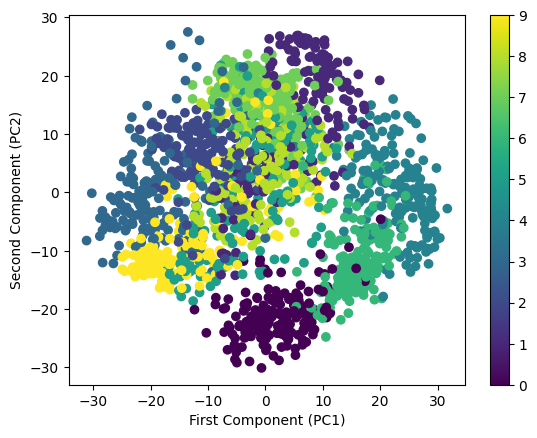

In [35]:
import matplotlib.pyplot as plt
plt.scatter(new_digits[:,0],new_digits[:,1],c=digits.target) # Class division
plt.xlabel('First Component (PC1)')
plt.ylabel('Second Component (PC2)')
plt.colorbar() # Use Color Bar
plt.show()

## **PCA for speedup models**

In [36]:
from sklearn.datasets import load_digits
import numpy as np

In [37]:
# Create Object
digits = load_digits()

In [38]:
digits.data.shape

(1797, 64)

**Feaure Scaling**

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

**Train and Test**

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_data,digits.target,test_size=0.2)

In [43]:
X_train.shape

(1437, 64)

In [45]:
# Use Logistic regression for train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)


# Look at Model Train Time
import time
start = time.time()
model.fit(X_train,y_train)
end = time.time() # train time
print((end-start)*1000) # Convert mili second

53.83896827697754


**Accurancy**

In [46]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9444444444444444

### **Calculate PCA**

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_pca = pca.fit_transform(new_data)

In [58]:
new_data_pca.shape

(1797, 10)

**Train and Test in PCA**

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_data_pca,digits.target,test_size=0.2)

In [60]:
X_train.shape

(1437, 10)

In [61]:
X_test.shape

(360, 10)

In [63]:
# Use Logistic regression for train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)


# Look at Model Train Time
import time
start = time.time()
model.fit(X_train,y_train)
end = time.time() # train time
print((end-start)*1000) # Convert mili second

49.63111877441406


**Accurancy**

In [64]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8805555555555555